In [48]:
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
speed_z_csv = "/media/rory/RDT VIDS/BORIS/RRD170/RDT OPTO CHOICE 0115/AlignmentData/Block_Trial_Type_Reward_Size_Start_Time_(s)/(1.0, 'Forced', 'Large')/speeds.csv"
df = pd.read_csv(speed_z_csv)

In [38]:
def str_to_int(arr) -> list:
    new_arr = []
    for i in arr:
        if "-" in i:
            neg_num = i.replace("-","")
            neg_num = float(neg_num)
            neg_num = round(neg_num, 2)
            if neg_num == 0.00:
                # it's a zero
                new_arr.append(str(neg_num))
            else:
                neg_num = "-" + str(neg_num)
                new_arr.append(neg_num)
        else:
            i = float(i)
            i = round(i, 2)
            i = str(i)
            new_arr.append(i)

    return new_arr

def add_val(arr, val):
    arr = arr + [val]
    return arr


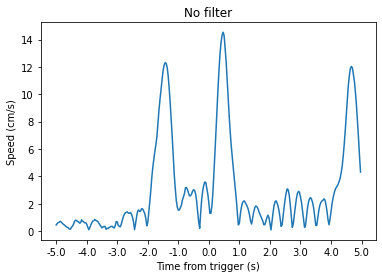

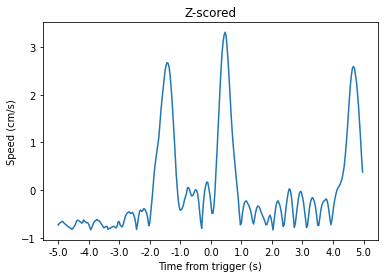

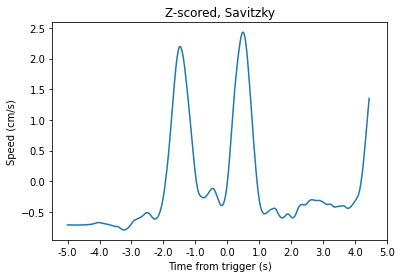

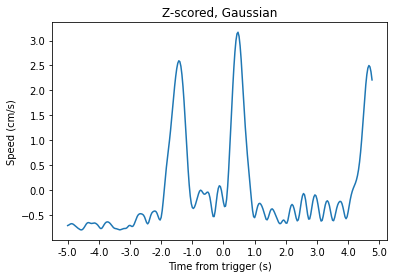

In [55]:
def plot_trace_deco(plot_trace):

    def wrapper(x,y,every_nth,xlabel,ylabel,title):
        fig, ax = plt.subplots()
        ax.plot(x, y)
        ax.set_xticks(x)
        ax.set_xlabel(xlabel)
        for n, label in enumerate(ax.xaxis.get_ticklabels()):
            if n % every_nth != 0:
                label.set_visible(False)
        for n, label in enumerate(ax.xaxis.get_major_ticks()):
            if n % every_nth != 0:
                label.set_visible(False)
        ax.set_ylabel(ylabel)
        ax.set_title(title)

    return wrapper

@plot_trace_deco
def plot_trace(x, y, every_nth, xlabel, ylabel):
    plt.show()
    plt.close()

def zscore(obs_value, mu, sigma):
    return (obs_value - mu) / sigma

arr_no_nan = list(df.iloc[0,1:])
arr = add_val(list(df.iloc[0,1:]), np.nan) #example trial trace
t = add_val(str_to_int(list(df.columns)[1:]), "5.0")

xlabel = "Time from trigger (s)"
ylabel = "Speed (cm/s)"

# No filter
plot_trace(t, arr, 30, xlabel, ylabel, title="No filter")

# Z-scored
avg = stats.tmean(arr_no_nan)
stdev = stats.tstd(arr_no_nan)
z_arr = zscore(arr, avg, stdev)

plot_trace(t, z_arr, 30, xlabel, ylabel, title="Z-scored")

"""# Savitzky - No Z-score
sav_arr = savgol_filter(arr, window_length=33, polyorder=2)
plot_trace(t, sav_arr, 30, xlabel, ylabel, title="Savitzky")"""

# Savitzky - Z-score
sav_z_arr = savgol_filter(z_arr, window_length=33, polyorder=2)
plot_trace(t, sav_z_arr, 30, xlabel, ylabel, title="Z-scored, Savitzky")

"""# Gaussian - No Z-score
gaus_arr = gaussian_filter1d(arr, sigma = 1.5)
plot_trace(t, gaus_arr, 30, xlabel, ylabel, title="Gaussian")"""

# Gaussian - Z-score
gaus_z_arr = gaussian_filter1d(z_arr, sigma = 1.5)
plot_trace(t, gaus_z_arr, 30, xlabel, ylabel, title="Z-scored, Gaussian")
